<a href="https://colab.research.google.com/github/BBotond03/SkinCancerDetection/blob/main/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script for Downloading the Data
1. We download the data  through the Kaggle API (for this we will have to provide out personal API key, this can be found at Kaggle profile settings).
2. Extract the downloaded zip file

In [1]:
#to be able to download the dataset to our current runtime
!pip install kaggle

In [6]:
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the actual file name from the dictionary
file_name = list(uploaded.keys())[0]
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Save the API key securely without displaying it
with open('/root/.kaggle/kaggle.json', 'wb') as f:
    f.write(uploaded[file_name])

# Set permissions
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [7]:
!kaggle competitions download -c isic-2024-challenge

 99% 1.99G/2.00G [00:28<00:00, 138MB/s]
100% 2.00G/2.00G [00:29<00:00, 74.0MB/s]


In [8]:
import zipfile
import os

# Path to your zip file and extract location
zip_file_path = 'isic-2024-challenge.zip'
extract_to_path = 'data'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)
    print("Extraction completed.")

Extraction completed.


# Data Visualisation

In [9]:
#necessary imports
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#read dataset into pandas dataframe
df = pd.read_csv('data/train-metadata.csv')

## Pecentage of people from each sex having a malignant melinoma

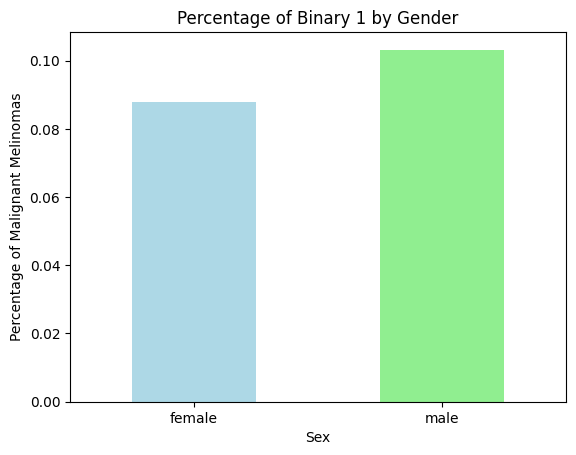

In [19]:
useful_columns = ['target', 'sex']

filtered_df = df[useful_columns]

# Group by gender and calculate the percentage of Binary == 1
percentage_ones = df.groupby("sex")["target"].mean() * 100
# Plot the data using Matplotlib
percentage_ones.plot(kind="bar", color=["lightblue", "lightgreen"])

# Add labels and title to the plot
plt.ylabel("Percentage of Malignant Melinomas")
plt.xlabel("Sex")
plt.title("Percentage of Binary 1 by Gender")
plt.xticks(rotation=0)


# Show the plot
plt.show()

## Percentage of people having malignant melinome in each age group.

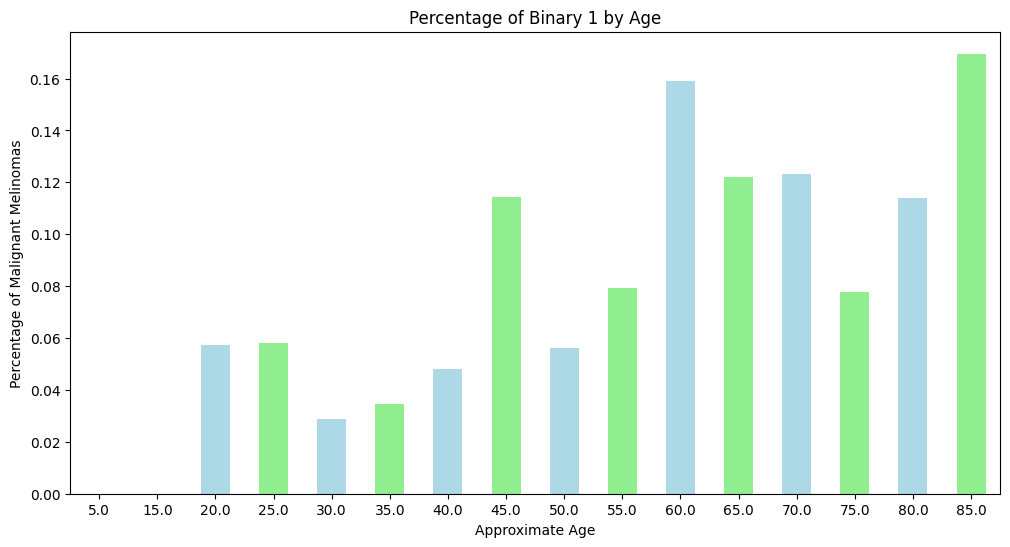

In [16]:
plt.figure(figsize=(12, 6))

useful_columns = ['target', 'age_approx']

filtered_df = df[useful_columns]

percentage_ones = df.groupby("age_approx")["target"].mean() * 100

percentage_ones.plot(kind="bar", color=["lightblue", "lightgreen"])

plt.ylabel("Percentage of Malignant Melinomas")
plt.xlabel("Approximate Age")

plt.title("Percentage of Binary 1 by Age")
plt.xticks(rotation=0)


plt.show()